# Etap 1.2.1
## wizualizacja danych z "Data/Concatenated Features/by_year_features.csv" za pomocą t-SNE
## kolorowanie według roku lub nazwy spółki

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

In [3]:
final_df= pd.read_csv("Data/Concatenated Features/by_year_features.csv")
final_df

,indeks,(SubTotal),Przepisy długoterminowe,Amortyzacja i straż pożarna,Kapitał partnerstwa głównego,Akcje mniejszościowe,Przepisy zadłużenia,Żywe istoty,Zachęta państwowa i pomoc,Zwiększenie wartości fundusze,...,Zobowiązania długoterminowe,Inne dochody i wydatki przed opodatkowaniem,Yab. Money Trans. Różnica. Efekt. Poprzedni.nak.ve nak. Tak jak. Wzrost/spadek netto,Sprzedaż zagraniczna,Sprzedaż krajowa,Akcje zysków/strat inwestycji cenianych metodą samowystarczalności,Samo -właściwość,Źródło_pliku,Nazwa,Rok
0,Yıllık,4.524640e+08,678404.0,1242248.0,1.387926e+08,0.0,2852756.0,0.0,0.0,0.0,...,2.806817e+06,449296.0,-9.990337e+06,0.0,0.000000e+00,0.0,1.387926e+08,A1CAP_2020.xlsx,A1CAP,2020
1,Yıllık,8.515088e+08,0.0,3263754.0,2.966258e+08,0.0,6670834.0,0.0,0.0,0.0,...,8.695590e+06,777230.0,1.219768e+08,0.0,0.000000e+00,0.0,2.966258e+08,A1CAP_2021.xlsx,A1CAP,2021
2,Yıllık,4.019261e+09,4748296.0,12651941.0,1.487849e+09,0.0,70752251.0,0.0,0.0,0.0,...,1.322796e+08,17107575.0,4.631366e+08,0.0,0.000000e+00,0.0,1.487849e+09,A1CAP_2022.xlsx,A1CAP,2022
3,Yıllık,6.297396e+09,7715324.0,21452328.0,3.696944e+09,0.0,42331251.0,0.0,0.0,0.0,...,3.402570e+07,6055765.0,6.918640e+08,0.0,0.000000e+00,0.0,3.696944e+09,A1CAP_2023.xlsx,A1CAP,2023
4,Yıllık,8.297508e+09,9773361.0,31826374.0,4.065838e+09,0.0,28062814.0,0.0,0.0,0.0,...,1.602956e+08,5169826.0,3.694612e+08,0.0,0.000000e+00,0.0,4.065838e+09,A1CAP_2024.xlsx,A1CAP,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6752,Yıllık,1.327080e+08,72995.0,165625.0,5.068184e+09,0.0,10233590.0,0.0,0.0,0.0,...,6.170988e+06,1884700.0,-9.830716e+07,7920512.0,5.550519e+07,310120.0,5.068184e+09,ZRGYO_2020.xlsx,ZRGYO,2020
6753,Yıllık,6.893466e+08,120595.0,930862.0,8.372611e+09,0.0,49141.0,0.0,0.0,0.0,...,5.515990e+06,0.0,5.720385e+08,15848936.0,6.865245e+07,410957.0,8.372611e+09,ZRGYO_2021.xlsx,ZRGYO,2021
6754,Yıllık,2.496854e+08,1176786.0,6006199.0,3.211000e+10,0.0,251237.0,0.0,0.0,0.0,...,1.342220e+09,0.0,-1.048027e+09,57049958.0,1.897433e+08,175390704.0,3.211000e+10,ZRGYO_2022.xlsx,ZRGYO,2022
6755,Yıllık,3.347212e+09,2191400.0,8614092.0,5.246534e+10,0.0,546147.0,0.0,0.0,0.0,...,2.347870e+09,0.0,2.255648e+09,94705431.0,8.667884e+08,0.0,5.246534e+10,ZRGYO_2023.xlsx,ZRGYO,2023


In [4]:
print(final_df.columns.values)

['indeks' '(SubTotal)' 'Przepisy długoterminowe'
 'Amortyzacja i straż pożarna' 'Kapitał partnerstwa głównego'
 'Akcje mniejszościowe' 'Przepisy zadłużenia' 'Żywe istoty'
 'Zachęta państwowa i pomoc' 'Zwiększenie wartości fundusze'
 'Inne należności' 'Inne długi' 'Inne stałe aktywa'
 'Inne obracające się zasoby' 'Inne obowiązki finansowe'
 'Inne dochody i wydatki' 'Inne dochody/ wydatki'
 'Inne zobowiązania krótkoterminowe' 'Inne długoterminowe obowiązki'
 'Inne dochody podatkowe (wydatki)'
 'Gotówka z innych działań inwestycyjnych' 'Inne ołówki Selfer'
 'Gotówka z innych działalności biznesowej'
 'Zobowiązanie podatkowe zysków terminowych'
 'Śnieg netto/uszkodzenie tego okresu' 'Dochody podatkowe (wydatki)'
 'Odroczone dochody podatkowe (wydatki)' 'Przełożona obecność podatkowa'
 'Odkładany obowiązek podatkowy'
 'Otrzymają z działalności sektora finansowego'
 'Długi z działalności sektora finansowego' 'Długi finansowe'
 'Inwestycje finansowe' 'Minione lata śnieg/straty'
 'Zapasy premi

In [5]:
len(final_df['Nazwa'].unique())

555

In [6]:
len(final_df['Rok'].unique())

17

C:\Users\matja\anaconda3\envs\votingfix\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


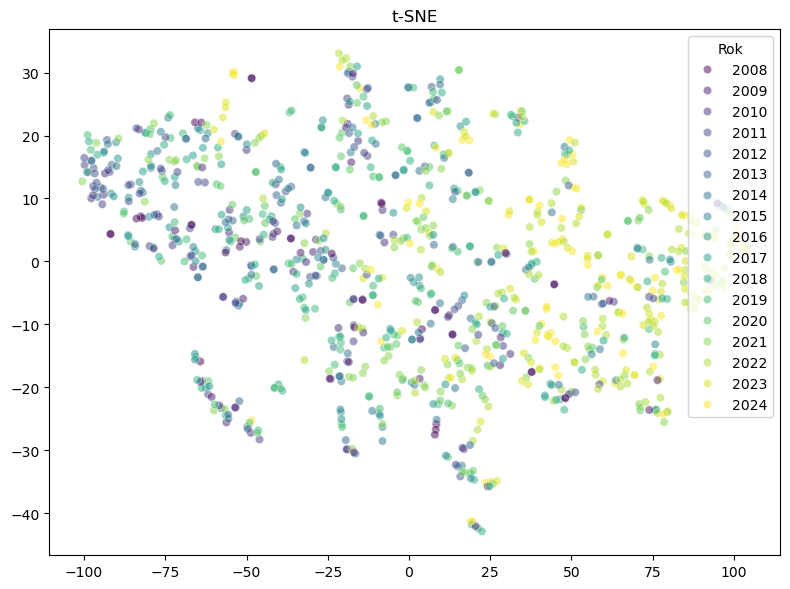

In [10]:

# Parametr: ile rekordów chcemy wyświetlić
n = 1000

# Losowy wybór n rekordów (jeśli mamy więcej niż n)
if len(final_df) > n:
    sampled_df = final_df.sample(n, random_state=42)
else:
    sampled_df = final_df.copy()

# 1. Przygotowanie danych: wybieramy tylko kolumny numeryczne i zamieniamy NaN na 0
num_cols = sampled_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
X = sampled_df[num_cols].fillna(0)

# Upewnijmy się, że kolumna 'rocznie' jest typu liczbowego (int) i posortowana
sampled_df['Rok'] = pd.to_numeric(sampled_df['Rok'], errors='coerce')
sampled_df['Rok'] = sampled_df['Rok'].sort_values()

# 2. t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=min(40, N//2), n_iter=1000)
X_tsne = tsne.fit_transform(X)

# 3. Wizualizacja
plt.figure(figsize=(8, 6))

# Scatter plot z legendą, uwzględniając porządek liczbowy
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sampled_df['Rok'], palette='viridis', legend='full',alpha=0.5 )

# Dodajemy tytuł
plt.title('t-SNE')

# Wyświetlamy legendę
plt.legend(title='Rok', loc='upper right')

plt.tight_layout()
plt.show()

C:\Users\matja\anaconda3\envs\votingfix\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


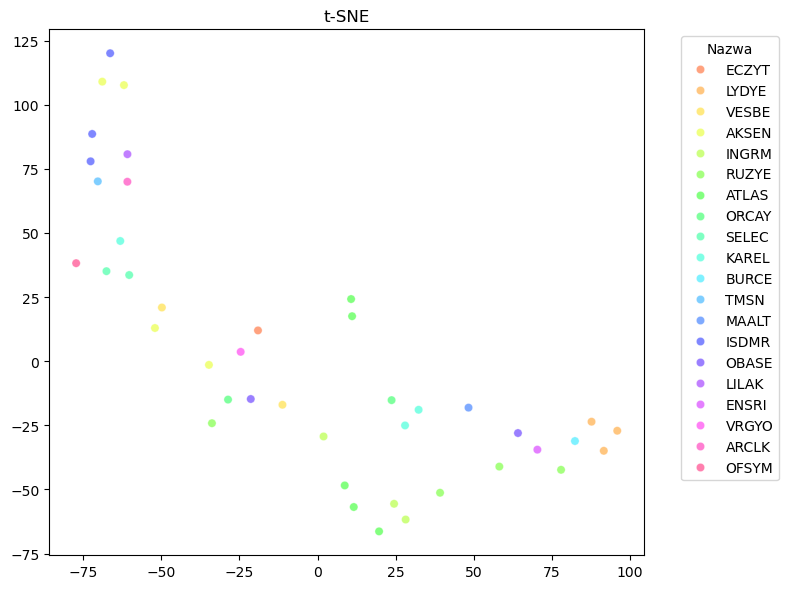

In [8]:
# Parametr: ile unikalnych nazw chcemy wybrać
N = 20  # Liczba unikalnych nazw

# Wybór N różnych nazw z kolumny 'nazwa' (lub jakiejkolwiek kolumny z unikalnymi wartościami)
unique_names = sampled_df['Nazwa'].drop_duplicates().sample(N, random_state=4)

# Filtrujemy rekordy, które odpowiadają wybranym nazwom
sampled_df_unique = sampled_df[sampled_df['Nazwa'].isin(unique_names)]

# 1. Przygotowanie danych: wybieramy tylko kolumny numeryczne i zamieniamy NaN na 0
X = sampled_df_unique.select_dtypes(include=[np.number]).fillna(0)


# 2. t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=min(N,5), n_iter=1000)
X_tsne = tsne.fit_transform(X)

# 3. Wizualizacja
plt.figure(figsize=(8, 6))

# 4. Przygotowujemy paletę kolorów dynamicznie
palette = sns.color_palette('hsv', n_colors=N)

# Scatter plot z legendą, uwzględniając porządek liczbowy
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sampled_df_unique['Nazwa'], palette=palette, legend='full',alpha=0.5 )

# Dodajemy tytuł
plt.title('t-SNE')

# Legenda
plt.legend(title='Nazwa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA


# Teraz zastosowanie PCA przed t-SNE dla większej próbki

n = 5700
if len(final_df) > n:
    sampled_df_pca = final_df.sample(n, random_state=42)
else:
    sampled_df_pca = final_df.copy()

# Przygotowanie danych numerycznych
X_pca = sampled_df_pca.select_dtypes(include=[np.number]).fillna(0)

# PCA do 10 wymiarów (zmniejszenie wymiarowości przed t-SNE)
pca = PCA(n_components=10, random_state=42)
X_reduced = pca.fit_transform(X_pca)

# t-SNE na zredukowanych danych
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne_pca = tsne.fit_transform(X_reduced)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne_pca[:, 0], y=X_tsne_pca[:, 1], hue=sampled_df_pca['Rok'], palette='viridis', alpha=0.6)
plt.title('t-SNE po PCA (kolorowanie wg roku)')
plt.legend(title='Rok', loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\matja\anaconda3\envs\votingfix\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


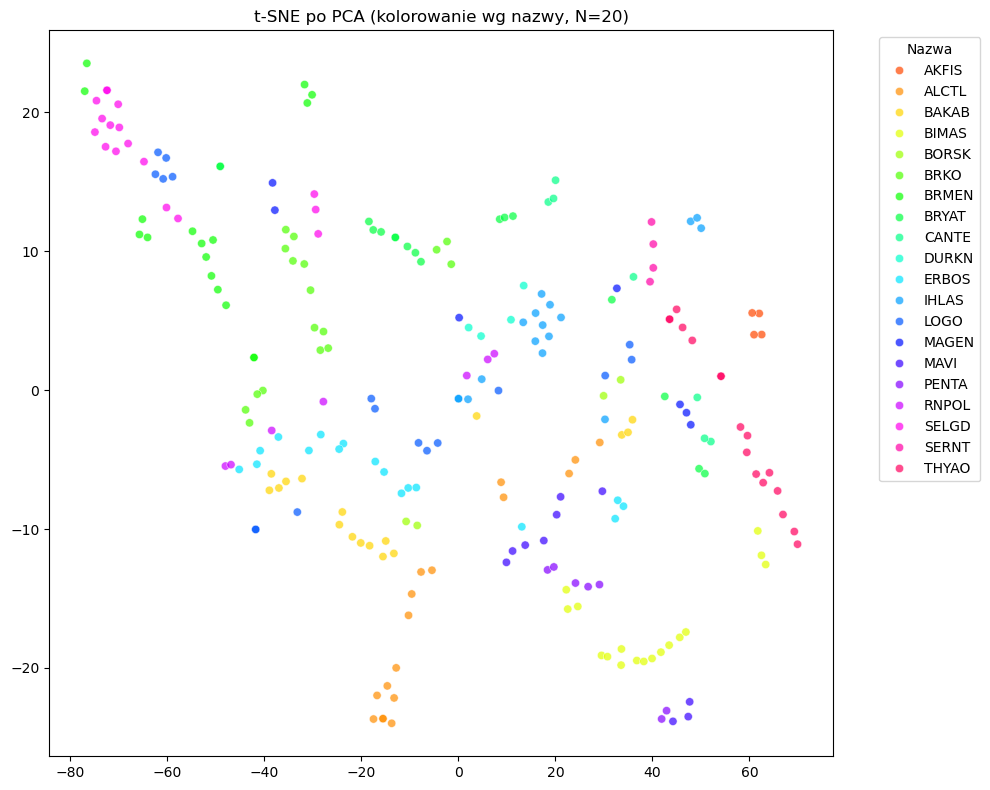

In [26]:
# t-SNE po PCA dla N nazw

N = 20
unique_names_all = final_df['Nazwa'].dropna().unique()
selected_names_all = np.random.choice(unique_names_all, size=min(N, len(unique_names_all)), replace=False)

sampled_df_names = final_df[final_df['Nazwa'].isin(selected_names_all)].copy()
X_names = sampled_df_names.select_dtypes(include=[np.number]).fillna(0)

pca = PCA(n_components=10, random_state=42)
X_names_reduced = pca.fit_transform(X_names)

tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, N//2), n_iter=1000)
X_tsne_names = tsne.fit_transform(X_names_reduced)

plt.figure(figsize=(10, 8))
palette = sns.color_palette('hsv', n_colors=N)
sns.scatterplot(x=X_tsne_names[:, 0], y=X_tsne_names[:, 1], hue=sampled_df_names['Nazwa'], palette=palette, alpha=0.7)
plt.title(f't-SNE po PCA (kolorowanie wg nazwy, N={N})')
plt.legend(title='Nazwa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Testujemy różne liczby klastrów
range_clusters = range(2, 10)
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, clusters)
    silhouette_scores.append(score)
    print(f"K = {k}, Silhouette Score: {score:.3f}")

# Optymalny K to ten z najwyższym silhouette score
best_k = range_clusters[np.argmax(silhouette_scores)]
print(f"Optymalna liczba klastrów wg silhouette score: {best_k}")

# Dopasowanie finalnego modelu
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters_final = kmeans_final.fit_predict(X_pca)

K = 2, Silhouette Score: 0.984
K = 3, Silhouette Score: 0.940
K = 4, Silhouette Score: 0.934
K = 5, Silhouette Score: 0.935
K = 6, Silhouette Score: 0.883
K = 7, Silhouette Score: 0.861
K = 8, Silhouette Score: 0.935
K = 9, Silhouette Score: 0.902
Optymalna liczba klastrów wg silhouette score: 2


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import numpy as np

# 1. Wybór cech numerycznych i uzupełnianie NaN
X = final_df.select_dtypes(include=[np.number]).fillna(0)

# 2. Skalowanie cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Usunięcie cech o bardzo niskiej wariancji (np. wariancja < 0.01)
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X_scaled)

print(f"Liczba cech po usunięciu niskowariantnych: {X_var.shape[1]}")

# 4. PCA do redukcji wymiarów, zostawimy 20 głównych komponentów (można dostosować)
pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X_var)

print(f"Wariancja wyjaśniona przez 20 PCA: {np.sum(pca.explained_variance_ratio_):.2f}")

Liczba cech po usunięciu niskowariantnych: 123
Wariancja wyjaśniona przez 20 PCA: 0.82


In [48]:
from sklearn.cluster import DBSCAN

# Testujemy parametry eps i min_samples (tutaj przykład)
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters_db = dbscan.fit_predict(X_pca)

# Ocena metryką Silhouette, ale tylko jeśli jest więcej niż 1 klaster
if len(set(clusters_db)) > 1 and -1 not in set(clusters_db):
    score_db = silhouette_score(X_pca, clusters_db)
    print(f"DBSCAN Silhouette Score: {score_db:.3f}")
else:
    print("Szum")

print("Unikalne etykiety klastrów:", set(clusters_db))

Szum
Unikalne etykiety klastrów: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(-1)}


In [51]:
import numpy as np
labels, counts = np.unique(clusters_db, return_counts=True)
for label, count in zip(labels, counts):
    print(f"Klaster {label}: {count} punktów")

Klaster -1: 3241 punktów
Klaster 0: 533 punktów
Klaster 1: 918 punktów
Klaster 2: 257 punktów
Klaster 3: 257 punktów
Klaster 4: 504 punktów
Klaster 5: 247 punktów
Klaster 6: 277 punktów
Klaster 7: 293 punktów
Klaster 8: 100 punktów
Klaster 9: 59 punktów
Klaster 10: 52 punktów
Klaster 11: 7 punktów
Klaster 12: 7 punktów
Klaster 13: 5 punktów


In [52]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=best_k)
clusters_agglo = agglo.fit_predict(X_pca)
score_agglo = silhouette_score(X_pca, clusters_agglo)
print(f"Agglomerative Clustering Silhouette Score: {score_agglo:.3f}")

Agglomerative Clustering Silhouette Score: 0.984
